In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Load the Data & Visualize it

In [19]:
X = pd.read_csv('./TrainingData/Linear_X_Train.csv')
Y = pd.read_csv('./TrainingData/Linear_Y_Train.csv')

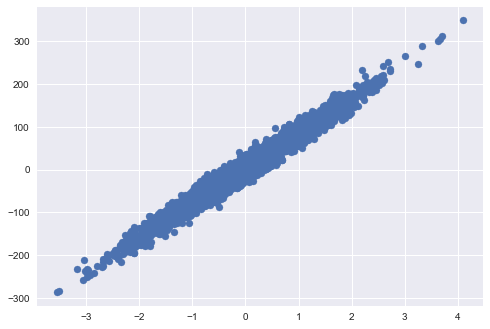

In [20]:
plt.scatter(X,Y)
plt.show()

In [21]:
X.shape

(3750, 1)

In [22]:
type(X)

pandas.core.frame.DataFrame

In [23]:
X = X.values
Y = Y.values

### Normalization

In [24]:
u = X.mean()
std = X.std()
print(u, std)

-0.03779466168006854 0.9920801322508517


In [25]:
X = (X - u)/std

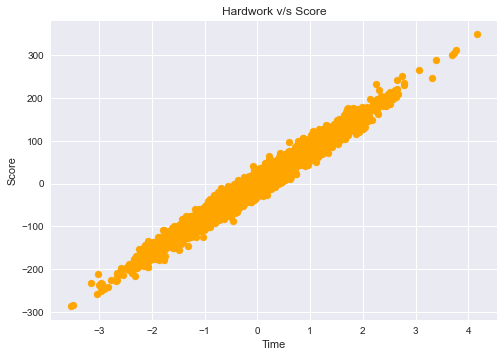

In [26]:
plt.style.use('seaborn')
plt.scatter(X,Y,color = 'orange')
plt.title('Hardwork v/s Score')
plt.xlabel('Time')
plt.ylabel('Score')
plt.show()

## Linear Regression

In [27]:
# theta is a vector which will contain both theta0 and theta1
def hypothesis(x, theta) :
    y_ = theta[0] + theta[1]*x
    return y_

def gradient(X, Y, theta) :
    grad = np.zeros((2,))
    m = X.shape[0]
    
    for i in range(m) : 
        x = X[i]
        y_ = hypothesis(x, theta)
        y = Y[i]
        
        grad[0] += (y_ - y)
        grad[1] += (y_ - y) * x
        
    return grad/m 

def error(X,Y,theta) :
    
    m = X.shape[0]
    
    total_error = 0.0 
    
    for i in range(m) :
        x = X[i]
        y_ = hypothesis(x, theta)
        y = Y[i]
        total_error += (y_ - y)**2
        
    return total_error/m

def gradientDescent(X,Y,steps = 100, lr = 0.1) :
    
    # start with zero value of theta
    theta = np.zeros((2,))
    
    error_list = []
    
    for i in range(steps) :
        
        grad = gradient(X,Y,theta)
        
        # error
        e = error(X,Y,theta)
        error_list.append(e)
        
        # update theta
        theta[0] = theta[0] - lr * grad[0] 
        theta[1] = theta[1] - lr * grad[1] 
        
    return theta, error_list
        

In [28]:
theta, error_list = gradientDescent(X,Y)

In [29]:
error_list

[array([6576.35005246]),
 array([5363.12510257]),
 array([4380.41289317]),
 array([3584.41600355]),
 array([2939.65852295]),
 array([2417.40496367]),
 array([1994.37958066]),
 array([1651.72902041]),
 array([1374.18206661]),
 array([1149.36903404]),
 array([967.27047765]),
 array([819.77064698]),
 array([700.29578413]),
 array([603.52114523]),
 array([525.13368772]),
 array([461.63984713]),
 array([410.20983626]),
 array([368.55152745]),
 array([334.80829731]),
 array([307.47628091]),
 array([285.33734761]),
 array([267.40481165]),
 array([252.87945752]),
 array([241.11392067]),
 array([231.58383582]),
 array([223.8644671]),
 array([217.61177843]),
 array([212.54710061]),
 array([208.44471157]),
 array([205.12177646]),
 array([202.43019901]),
 array([200.25002128]),
 array([198.48407732]),
 array([197.05366271]),
 array([195.89502687]),
 array([194.95653185]),
 array([194.19635088]),
 array([193.58060429]),
 array([193.08184956]),
 array([192.67785822]),
 array([192.35062524]),
 array(

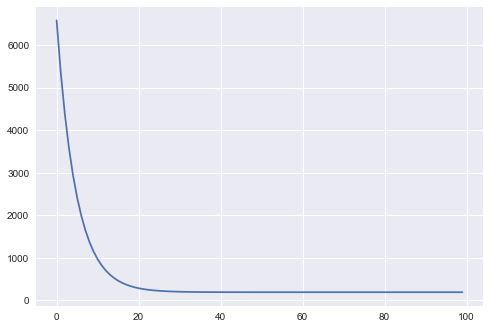

In [30]:
plt.plot(error_list)

## Prediction

In [31]:
Y_ = hypothesis(X, theta)
print(Y_)

[[-19.5733619 ]
 [-43.69571729]
 [ 86.4848761 ]
 ...
 [-20.85044708]
 [138.70197319]
 [-35.87897262]]


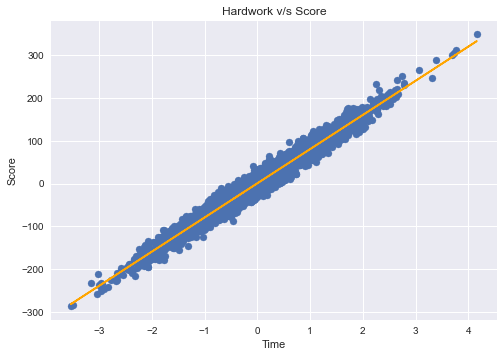

In [32]:
plt.style.use('seaborn')
plt.scatter(X,Y)
plt.plot(X,Y_,color = 'orange')
plt.title('Hardwork v/s Score')
plt.xlabel('Time')
plt.ylabel('Score')
plt.show()

### R2 Score

In [33]:
def r2_score(Y, Y_) :
    num = np.sum((Y - Y_)**2)
    denom = np.sum((Y - Y.mean())**2)
    score = 1 - num/denom
    
    return score * 100

In [34]:
r2_score(Y,Y_)

97.09612226971643